In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# reproducibility
np.random.seed(7)

# 20 sample data points
coffee_cups = np.random.randint(0, 10, 20)              # cups of coffee per day (0–9)
productivity = 5 * coffee_cups + np.random.normal(0, 5, 20)  # roughly linear + noise

# Create DataFrame
df = pd.DataFrame({
    "Coffee_Cups": coffee_cups,
    "Productivity": productivity
})

print(df.head())


   Coffee_Cups  Productivity
0            4     19.925159
1            9     45.106953
2            6     33.743905
3            3     14.584321
4            3     15.353646


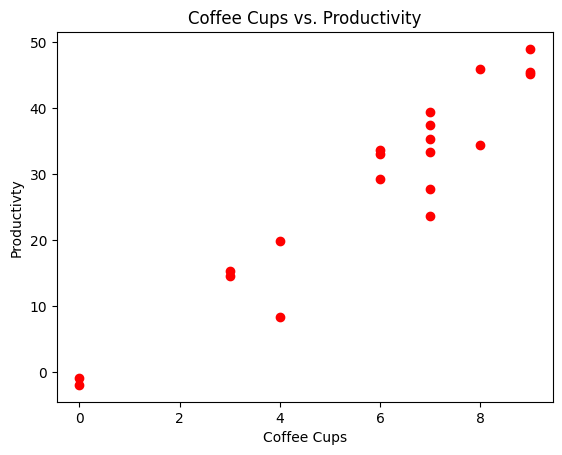

In [3]:
# Visualizing created data
plt.scatter(coffee_cups, productivity, color="red")
plt.xlabel("Coffee Cups")
plt.ylabel("Productivty")
plt.title("Coffee Cups vs. Productivity")
plt.show()

In [4]:
# Splitting the data into training and test groups
X_train, X_test, y_train, y_test = train_test_split(coffee_cups, productivity, test_size=0.2, random_state=7)
print("The split data is as follows:")
print("X's training set is:", X_train)
print("y's training set is:", y_train)
print("X's test set is:", X_test)
print("y's test set is:", y_test)

The split data is as follows:
X's training set is: [8 4 7 7 6 6 9 4 7 7 8 7 9 3 3 0]
y's training set is: [45.88331523 19.92515896 37.38507901 39.36946903 29.21590692 33.00006921
 48.97092262  8.35578454 35.35330311 23.74832636 34.46441314 27.82337021
 45.51786973 14.58432084 15.35364571 -0.8425633 ]
X's test set is: [9 0 6 7]
y's test set is: [45.10695337 -1.89602238 33.74390538 33.32899893]


In [5]:
# Firstly we calculate the slope as covariance(X, Y) / variance(X)
mean_X_train = np.mean(X_train)
mean_y_train = np.mean(y_train)

# Covariance
cov_numerator = 0
for i in range(len(X_train)):
    cov_numerator += ((X_train[i] - mean_X_train) * (y_train[i] - mean_y_train))

print("Numerator value for covariance calculating:", cov_numerator)

covariance = cov_numerator / len(X_train)
print("The covariance will be: ", covariance)

# Variance of X
sum_X = 0
for i in range(len(X_train)):
    sum_X += ((X_train[i] - mean_X_train) ** 2)

variance_X = (1 / len(X_train)) * sum_X
print("Variance of X is:", variance_X)

slope = covariance / variance_X
print("Slope value is:", slope)

Numerator value for covariance calculating: 495.15274911136714
The covariance will be:  30.947046819460446
Variance of X is: 5.80859375
Slope value is: 5.327803621911146


In [6]:
# Next we calculate the y-intercept as mean(y) - (slope * mean(x))
y_intercept = mean_y_train - slope * mean_X_train
print("Y-Intercept is:", y_intercept)
print(f"Our line of best fit should be of the form: y = {slope}m + {y_intercept}")

Y-Intercept is: -3.002059547655289
Our line of best fit should be of the form: y = 5.327803621911146m + -3.002059547655289


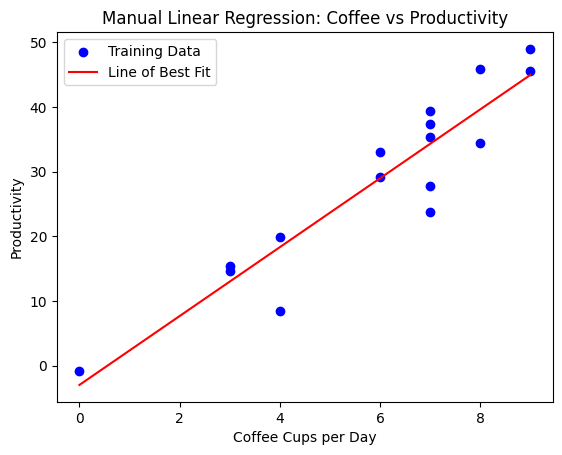

In [7]:
# Plotting this on the graph we see

plt.scatter(X_train, y_train, color="blue", label="Training Data")
x_line = np.linspace(X_train.min(), X_train.max(), 100)
y_line = slope * x_line + y_intercept

# Plotting regression line
plt.plot(x_line, y_line, color="red", label="Line of Best Fit")

# Graph to show
plt.xlabel("Coffee Cups per Day")
plt.ylabel("Productivity")
plt.title("Manual Linear Regression: Coffee vs Productivity")
plt.legend()
plt.show()


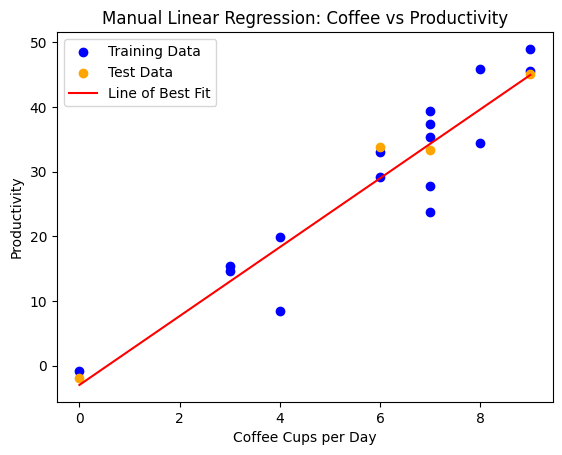

In [11]:
# Adding in the test data now
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, label="Test Data", color="orange")
plt.plot(x_line, y_line, color="red", label="Line of Best Fit")
plt.xlabel("Coffee Cups per Day")
plt.ylabel("Productivity")
plt.title("Manual Linear Regression: Coffee vs Productivity")
plt.legend()
plt.show()


In [ ]:
# Calculating r^2 score on test data
y_predictions = slope * X_test + y_intercept
sse = np.sum((y_test - y_predictions) ** 2)

y_test_mean = np.mean(y_test)
sst = np.sum((y_test - y_test_mean) ** 2)
r_2 = 1 - (sse / sst)

print(r_2)
print("A score of approximately 0.97 tells us very close predictions")

0.9799392878509191
A score of approximately 0.97 tells us very close predictions


In [19]:
# Calculating MSE on test data
mse = (1 / len(y_test)) * sse
print(mse)
print("We have an average squared error of 6.25 so our predictions are relatively close")

6.254300048221593
We have an average squared error of 6.25 so our predictions are relatively close
